In [40]:
import sys
sys.path.append('../')

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from architectures.LeNet5 import LeNet5, SubSamplingLayer, C3Conv2DLayer
from src.helpers import Device, train
from src.metrics import Accuracy

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# parameters
RANDOM_SEED = 42
LEARNING_RATE = 0.001
BATCH_SIZE = 32
N_EPOCHS = 1

IMG_SIZE = 32
N_CLASSES = 10

In [4]:
# define transforms
transforms = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])

In [5]:
# download and create datasets
train_dataset = datasets.MNIST(root='./mnist_data', 
                               train=True, 
                               transform=transforms,
                               download=True)

valid_dataset = datasets.MNIST(root='./mnist_data', 
                               train=False, 
                               transform=transforms)

In [6]:
# define the data loaders
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True,num_workers=5)

valid_loader = DataLoader(dataset=valid_dataset, 
                          batch_size=1100*BATCH_SIZE, 
                          shuffle=False,num_workers=5)

In [7]:
batch, y = next(iter(train_loader))
batch.shape

torch.Size([32, 1, 32, 32])

# Training

In [8]:
torch.manual_seed(RANDOM_SEED)
device = Device().get()
model = LeNet5(N_CLASSES).to(device)

In [9]:
model

LeNet5(
  (feature_extractor): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Atanh()
    (2): SubSamplingLayer(
      (conv): Conv2d(6, 6, kernel_size=(1, 1), stride=(1, 1), groups=6)
    )
    (3): Sigmoid()
    (4): C3Conv2DLayer(
      (conv): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    )
    (5): Atanh()
    (6): SubSamplingLayer(
      (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), groups=16)
    )
    (7): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (8): Atanh()
  )
  (classifier): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Atanh()
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [10]:
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

19:41:49 --- Epoch: 0	Train loss: 0.0458	Valid loss: 0.0640	Accuracy: 0.9867	Validation Accuracy: 0.9814
19:42:29 --- Epoch: 1	Train loss: 0.0393	Valid loss: 0.0503	Accuracy: 0.9903	Validation Accuracy: 0.9847


../src/helpers.py:86: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


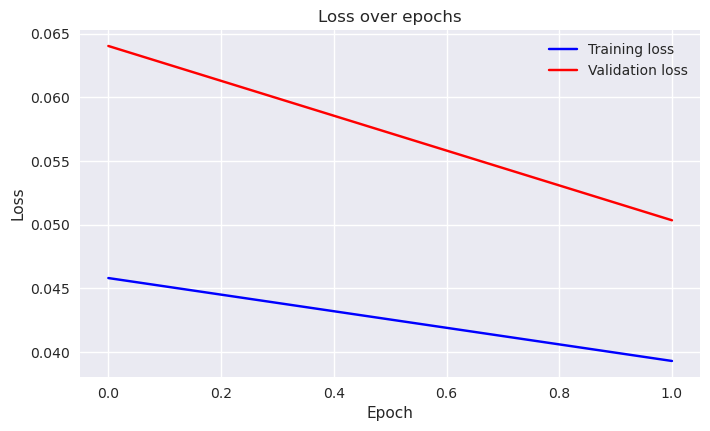

In [45]:
model, optimizer, metrics = train(model, criterion, optimizer, train_loader, valid_loader, 2, device, eval_metrics=[Accuracy()])

../src/helpers.py:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


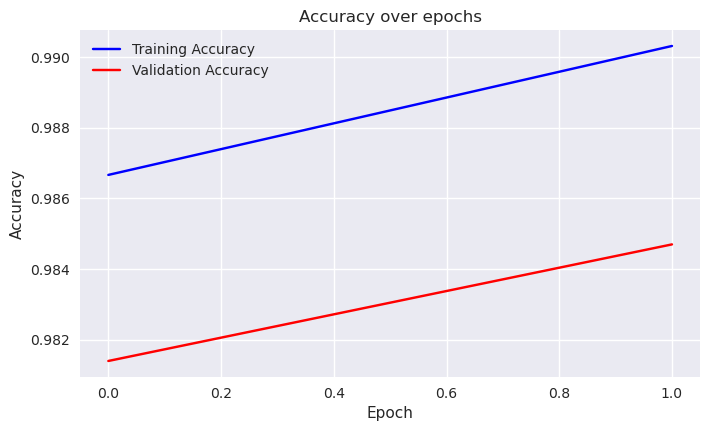

In [47]:
metrics['Accuracy'].plot()